<a href="https://colab.research.google.com/github/VandanGupte101727/AMAZON-stock-price-prediction-/blob/main/KNN_Regressor_AMAZON_stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv('/content/AMAZON_monthly.csv')
data['Date'] = pd.to_datetime(data['Date'])
data['Date_ordinal'] = data['Date'].map(pd.Timestamp.toordinal)

X = data.drop(['Close', 'Date'], axis=1)
Y = data['Close']
print(X.dtypes)
print(Y)

X_train_reg, X_test_reg, Y_train_reg, Y_test_reg = train_test_split(X, Y, test_size=0.2, random_state=44)

params = {'n_neighbors': list(range(2, 16))}
knn_reg = KNeighborsRegressor()
model_reg = GridSearchCV(knn_reg, params, cv=5)
model_reg.fit(X_train_reg, Y_train_reg)

predictions = model_reg.predict(X_test_reg)

r2 = r2_score(Y_test_reg, predictions)
mae = mean_absolute_error(Y_test_reg, predictions)
mse = mean_squared_error(Y_test_reg, predictions)
rmse = np.sqrt(mse)

print("R² Score:", r2)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)


Open            float64
High            float64
Low             float64
Adj Close         int64
Volume          float64
Date_ordinal      int64
dtype: object
0        0.075000
1        0.077083
2        0.119792
3        0.116927
4        0.216927
          ...    
335    184.419998
336    205.009995
337    219.389999
338    234.110001
339    214.750000
Name: Close, Length: 340, dtype: float64
R² Score: 0.5265341232282926
MAE: 28.802119868029564
MSE: 1915.245705166574
RMSE: 43.7635202556487


In [5]:
print(predictions)

[165.62359188   3.27872496  18.69198305   2.6018625   76.83014956
   4.06240003  85.13965006   2.73885048  80.67022493  49.74890041
   2.08244798  49.18140034   2.50650001   2.84448799  82.84654903
   3.69572496   3.26739998  34.02323243   4.35015004  10.37694973
  64.1478578   11.98169979  34.28719879  50.24930038 103.59797552
  74.66314898  72.55120049  39.80879449  34.02323243  34.02323243
  75.75352457  70.96035042   2.54048549   3.0116625  117.63195661
   1.04193748   2.48375046   3.01324998   2.61138799  24.27065945
  87.34150066  10.50319975 116.80245056 165.62359188   1.75851248
  85.69950027   2.08244798  60.17269964   2.84949999  82.08914948
  10.55488869  57.98560038 165.62359188  35.04749877 176.40589943
  21.11659987   3.02880003  58.63287476   2.99045001  20.56150547
 183.11189919 150.7530489    2.77512497  50.18049917  87.96165047
  33.191549    71.70564985 154.08914852]


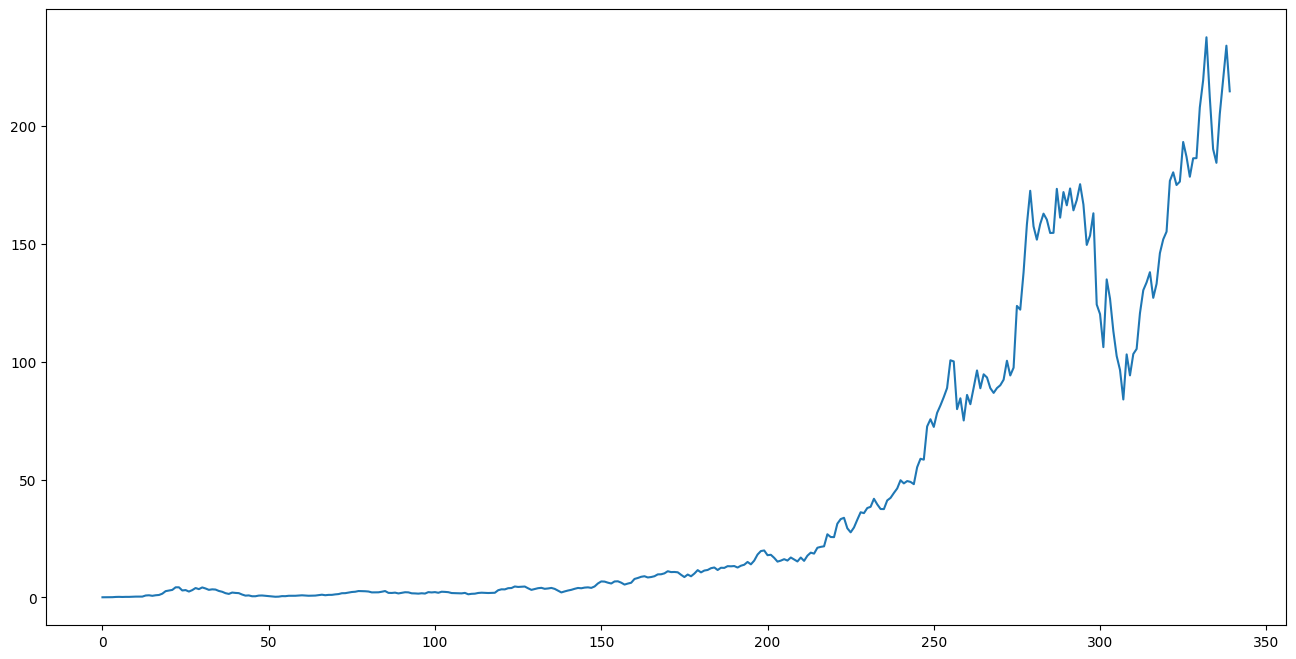

In [10]:
plt.figure(figsize=(16,8))
plt.plot(data['Close'],label='Close Price')